# About

Numerical plots pertaining to trials of an N-dim Kuramoto system with adaptive delays. Requires a folder of .mat files from the the following scripts:
 - scriptND_iter.m
 - script.m

Uses the following packages and functions:

# Library

In [1]:
from __future__ import division, print_function

%matplotlib inline
# Toggle on/off
# %matplotlib notebook

import os
import numpy as np
import scipy.io as sio
from scipy import optimize
from scipy import stats
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.transforms as tsfm
import math
from math import pi

from lib import *

from IPython.display import clear_output

# Directories

In [2]:
# Data files (for fig.4d)
import_folder = 'matlab_fig5' # 'matlabND_multi_N30_4','matlabND_multi_N30_2'
export_folder = 'export'
ex_name = 'fig5'

# Directory
dir_main = os.getcwd()
dir_im = os.path.join(dir_main, 'data', import_folder)
dir_ex = os.path.join(dir_main, 'data', export_folder)

filenames = os.listdir(dir_im)

# Import and compile data

## Constant parameters

In [3]:
dir_sam = os.path.join(dir_im, filenames[0])
dict_mat = sio.loadmat(dir_sam)

param = {'g': dict_mat['g'][0,0],
         'omega0': dict_mat['omega0'][0,0],
         'gain': dict_mat['gain'][0,0],
         'tf': dict_mat['tf'][0,0],
         'tau0': dict_mat['tau0'][0,0],
         }

# Asymptotic percentage
asy = 0.1

## Asymptotic values

In [4]:
# Compiled arrays
init_freqs = np.zeros(len(filenames))
init_stds = np.zeros(len(filenames))
asy_freqs = np.zeros(len(filenames))
asy_stds = np.zeros(len(filenames))
var_freqs = np.zeros(len(filenames))

for i in range(len(filenames)):
    
    # Import .mat file
    dir_mat = os.path.join(dir_im, filenames[i])
    dict_mat = sio.loadmat(dir_mat)
    
    # Compile solution dictionary
    sol = {'t': np.reshape(dict_mat['t'], -1),
           'y': dict_mat['y'],
           'yp': dict_mat['yp'],
           'tau': dict_mat['tau'],
           'taup': dict_mat['taup']
          }
    
    init_freq = dict_mat['init_freq'][0,0]
    init_std = dict_mat['std'][0,0]
    
    # Compute the global frequency:
    arr_omega = asylib.weight_avg(sol['t'], sol['yp'], asy)
    asy_Omega = np.sum(arr_omega) / arr_omega.size

    Omega_vars = asylib.weight_avg(sol['t'], (sol['yp'] - asy_Omega)**2, asy)
    Omega_var = np.sum(Omega_vars)

    # Get array of asymptotic phases:
    arr_lin = asy_Omega*sol['t']
    arr_lin = arr_lin[:,None]

    arr_phases = sol['y'] - arr_lin
    asy_phases = asylib.weight_avg(sol['t'], arr_phases, asy)

    # Variance
    phase_vars = asylib.weight_avg(sol['t'], (arr_phases - asy_phases)**2, asy)
    phase_var = np.mean(phase_vars)
    
    N = asy_phases.size
    
    # SAVE TO ARRAYS
    init_freqs[i] = init_freq
    init_stds[i] = init_std
    asy_freqs[i] = asy_Omega
    asy_stds[i] = np.sqrt((N/(N-1))*np.var(asy_phases))
    var_freqs[i] = Omega_var
    
    # Print statements:
    print("Trial: " + filenames[i] + ', init.Delta = ' + str(init_std))

Trial: sol_num1.mat, init.Delta = 0.2949379116922256
Trial: sol_num10.mat, init.Delta = 0.37995150038852427
Trial: sol_num2.mat, init.Delta = 0.037419873827384154
Trial: sol_num3.mat, init.Delta = 0.07767681666684478
Trial: sol_num4.mat, init.Delta = 0.08200937081388482
Trial: sol_num5.mat, init.Delta = 0.07763938723148117
Trial: sol_num6.mat, init.Delta = 0.4473438436940578
Trial: sol_num7.mat, init.Delta = 0.07059425933456942
Trial: sol_num8.mat, init.Delta = 0.1046520097079719
Trial: sol_num9.mat, init.Delta = 0.26768853840846824


## Export

In [5]:
# Define export dictionary
ex_mat = {'init_freqs': init_freqs,
          'init_stds': init_stds,
          'asy_freqs': asy_freqs,
          'asy_stds': asy_stds,
          'var_freqs': var_freqs,
          'g': param['g'],
          'w0': param['omega0'],
          'tau0': param['tau0'],
          'gain': param['gain']
          }

# Copy parameters
for par in param.keys():
    ex_mat[par] = param[par]

# Export to .mat (export folder)
dir_exfile = os.path.join(dir_ex, ex_name)
sio.savemat(dir_exfile, ex_mat)

# Arrays over time

Skip to this cell if asymptotic arrays have already been processed.

In [6]:
# Import from folder2 with at least two trials| (converging to different frequencies
trial1 = {'color': 'blue', 'name': 'sol_num1'}
# trial1 = {'color': 'blue', 'name': 'sol_num1'}

### Trial

In [7]:
dir_mat1 = os.path.join(dir_im, trial1['name'])
dict_mat1 = sio.loadmat(dir_mat1)

trial1['t'] = np.reshape(dict_mat1['t'], -1)
trial1['y'] = dict_mat1['y']
trial1['yp'] = dict_mat1['yp']
trial1['tau'] = dict_mat1['tau']
trial1['init_freq'] = dict_mat1['init_freq'][0,0]
trial1['std'] = dict_mat1['std'][0,0]

# Compute the asymptotic arrays
arr_omega1 = asylib.weight_avg(trial1['t'], trial1['yp'], asy)
asy_Omega1 = np.sum(arr_omega1) / arr_omega1.size


sol1 = {'t': np.reshape(dict_mat1['t'], -1),
       'y': dict_mat1['y'],
       'yp': dict_mat1['yp'],
       'tau': dict_mat1['tau'],
       'taup': dict_mat1['taup']
      }

# Get array of asymptotic phases:
arr_lin1 = asy_Omega1*sol1['t']
arr_lin1 = arr_lin1[:,None]

arr_phases1 = trial1['y'] - arr_lin1
asy_phases1 = asylib.weight_avg(trial1['t'], arr_phases1, asy)
asy_phases_mod = asylib.mod_pi(asy_phases1)

# phase_vars = asylib.weight_avg(sol['t'], (arr_phases - asy_phases)**2, asy)
phase_var = np.var(asy_phases_mod)
    
# Mean zero asy phases:
cen_phases = asy_phases_mod - np.mean(asy_phases_mod)

# Store
trial1['phases'] = arr_phases1
trial1['asy_phases'] = asy_phases_mod
trial1['asy_Omega'] = asy_Omega1
trial1['asy_std'] = np.sqrt(phase_var)

# Asymptotic arrays

In [8]:
# Import arrays and values
dir_exfile = os.path.join(dir_ex, ex_name)
dict_ex = sio.loadmat(dir_exfile)

init_freqs = np.reshape(dict_ex['init_freqs'], -1)
init_stds = np.reshape(dict_ex['init_stds'], -1)
asy_freqs = np.reshape(dict_ex['asy_freqs'], -1)
asy_stds = np.reshape(dict_ex['asy_stds'], -1)

# Theoretical arrays

## Parameters

In [9]:
# Parameters
g = dict_ex['g'][0,0]
w0 = dict_ex['w0'][0,0]
tau0 = dict_ex['tau0'][0,0]
gain = dict_ex['gain'][0,0]

param = {'g': g,
         'omega0': w0,
         'tau0': tau0, 
         'gain': gain
         }

# Settings
Omega_range = g
delta_range = 1.1*init_stds.max()

part_Omega = 200
part_delta = 200

steps = 400

Omega_cap = 0.5
eig_cap = 1

# Generate error meshes
Omega_arr = np.linspace(w0 - Omega_range, w0 + Omega_range, num=part_Omega)
delta_arr = np.linspace(0, delta_range, num=part_delta)
Omega_mesh, delta_mesh = np.meshgrid(Omega_arr, delta_arr)


steps = 400

# Fixed-point functions
Omega_fun = lambda Omega, delta2: funlib.Omega_infty(Omega, delta2, param, L=2*pi, steps=steps) - Omega

# Generate error meshes of Omega_fun
cap = 0.5

# Processing function
z_fun = lambda x: x

# Generate error meshes
Omega_arr = np.linspace(w0 - g, w0 + g, num=part_Omega)
delta_arr = np.linspace(0,1, num=part_delta)
delta_mesh, Omega_mesh = np.meshgrid(delta_arr, Omega_arr)

### Full error mesh

In [10]:
# Fixed-point functions
Omega_fun = lambda Omega, delta2: funlib.Omega_infty(Omega, delta2, param, L=2*pi, steps=steps) - Omega
# Omega_fun_asy = lambda Omega, delta2: eigenlib.Omega_infty_asy(Omega, delta2, param, deg_sin=50) - Omega

# Processing function
z_fun = lambda x: x

# Generate error mesh
err_mesh = np.zeros(Omega_mesh.shape)

for j in range(delta_arr.size):
    for k in range(Omega_arr.size):
        new_err = Omega_fun(Omega_mesh[j,k], delta_mesh[j,k]**2)
        err_mesh[j,k] = np.max((np.min((new_err, Omega_cap)), -Omega_cap))
    
z_mesh = z_fun(err_mesh)
# z_mesh = z_mesh / np.abs(z_mesh).max()

# Set the limits of the plot to the limits of the data
z_bound = np.abs(z_mesh).max()

### Error arrays and solution curve

In [11]:
# Obtain Omega = Omega(delta) function
Omega_roots = np.zeros(delta_arr.size+1)
Omega_roots[0] = w0

for k in range(delta_arr.size):
    deltak = delta_arr[k]
    Omega_funk = lambda Omega: Omega_fun(Omega, deltak**2)
    new_root = rootlib.find_root(Omega_funk, Omega_roots[k], w0-g, w0+g, steps=100)
    if new_root[1]:
        Omega_roots[k+1] = new_root[0]

Omega_roots = Omega_roots[1:]

### Polynomial Roots

In [12]:
# Numerical options
steps = 400
L = 2*pi
deg = 3
R = 10

# Terms of eigenvalue polynomial
eig_terms_fun = lambda u,v2: eigenlib.eig_infty_poly(deg, u, v2, param, R=R, L=L, steps=steps)

stab_arr = np.zeros(Omega_roots.size)
stab_mesh = np.zeros(delta_mesh.shape)

for j in range(delta_arr.size):          
    for k in range(Omega_arr.size):
        
        # Get eigenvalue polynomial coefficients
        eig_coeffs = eig_terms_fun(Omega_mesh[j,k], delta_mesh[j,k]**2)
        
        # Get roots of eigenvalue polynomial (remove all zeros)
        eig_roots = np.roots(eig_coeffs)
        eig_roots = eig_roots[np.abs(eig_roots) > 1e-8]
        
        if eig_roots.size == 0:
            max_real = 0
        else:
            max_real = np.max(np.real(eig_roots))
        
        stab_entry = np.max((np.min((max_real, 1)), -1))
        stab_mesh[j,k] = stab_entry

Omega_min = Omega_arr.min()
Omega_max = Omega_arr.max()
delta_min = delta_arr[1:].min()
delta_max = delta_arr[1:].max()

# Plot

## Options

In [13]:
# Plot positions [left, bottom, width, height] 
bbox0 = [0.10, 0.7, 0.3, 0.20]  # Fig 2a: Derivative plots
bbox1 = [0.10, 0.4, 0.3, 0.20]  # Fig 2b: sin(phase) plots
bbox2 = [0.10, 0.1, 0.3, 0.20] # Fig 2c: Delay plots
bbox3 = [0.50, 0.1, 0.40, 0.5] # Fig 2e: Iterated trial plot
bbox4 = [0.50, 0.7, 0.40, 0.2] # Fig 2d: Histogram plot with Gaussian fit
bbox5 = [0.95, 0.1, 0.05, 0.5] # Heat map for Fig 2e


# Figure a,b,c lines
line_opts = {'linewidth': 1.2,
             'alpha': 0.4
            }

tf = np.max(trial1['t'])
TF = 40

alpha = 0.9
levels = np.linspace(-1, 1, 4, endpoint=True)

# Dotted lines (linking initial to asy points in fig.d)
dotopts = {'linestyle': '-',
           'linewidth': 0.5,
           'marker': None,
           'color': 'black',
           'alpha': 0.7
          }

# Marker sizes
asysize = 50
initsize = 25
initsize2 = 75

# Sample which delay indices to plot:
NN = trial1['tau'].shape[1]
num_inds = 50
inds = np.random.choice(np.arange(NN), size=num_inds, replace=False)

# Histogram
L_dist = 5*np.sqrt(np.var(cen_phases))
num_bins = 30
bins_dist = np.linspace(-L_dist, L_dist, num=num_bins)

gauss_x = np.linspace(-L_dist, L_dist, num=200)
g_var = np.var(cen_phases)
gauss_y = 1/np.sqrt(2*pi*g_var)*np.exp(-gauss_x**2/(2*g_var))

## Generate figure

Shapiro-Wilk Test p-value: 0.005357154179364443
{'g': 1.5, 'omega0': 1, 'tau0': 0.1, 'gain': 80}


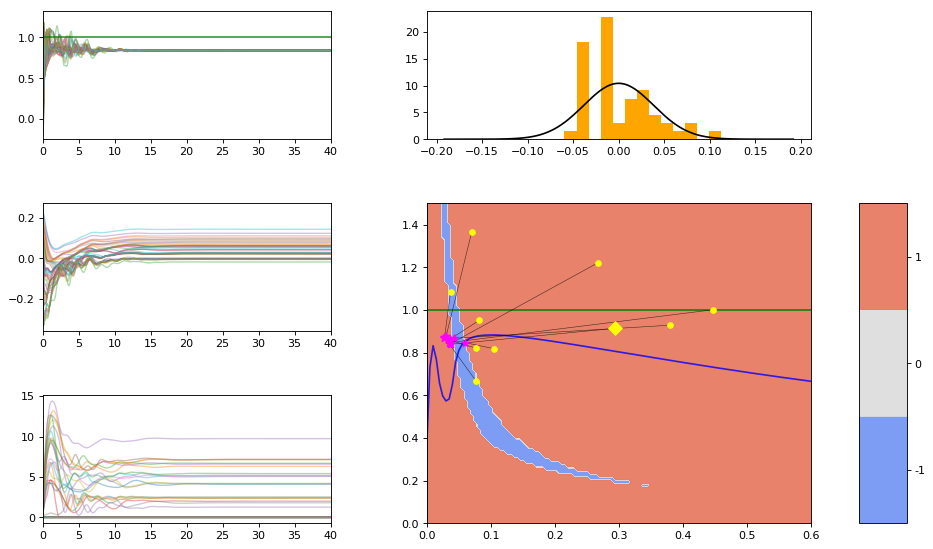

In [14]:
fig, ax = plt.subplots(6, figsize=(12,8), dpi=80)

# Set positions
ax[0].set_position(bbox0)
ax[1].set_position(bbox1)
ax[2].set_position(bbox2)
ax[3].set_position(bbox3)
ax[4].set_position(bbox4)
ax[5].set_position(bbox5)


# Figure A,B,C
ax[0].plot(trial1['t'], trial1['yp'], **line_opts)
ax[1].plot(trial1['t'], np.sin(trial1['phases']), **line_opts)
ax[2].plot(trial1['t'], trial1['tau'][:,inds], **line_opts)

ax[0].axhline(y=dict_ex['w0'], color='green', alpha=0.8, linewidth=1.5)


# Figure E
for k in range(init_freqs.size):
    p1 = np.array([init_freqs[k], asy_freqs[k]])
    p2 = np.array([init_stds[k], asy_stds[k]])
    ax[3].plot(p2, p1, **dotopts, zorder=2)

c = ax[3].contourf(delta_mesh, Omega_mesh, np.sign(stab_mesh), levels, cmap='coolwarm', alpha=alpha, zorder=0)
ax[3].axis([delta_min, delta_max, 0, 1.5 * param['omega0']])

ax[3].plot(delta_arr, Omega_roots, color='blue', alpha=0.8, zorder=1)
ax[3].scatter(init_stds, init_freqs, color='yellow', s=initsize, zorder=3)
ax[3].scatter(asy_stds, asy_freqs, color='magenta', marker='*', s=asysize, zorder=4)

# Selected trial A,B,C
ax[3].scatter(trial1['std'], trial1['init_freq'], marker='D', color='yellow', s=initsize2, zorder=3)
ax[3].axhline(y=dict_ex['w0'], color='green', alpha=0.9, zorder=1)
ax[3].axvline(x=0, color='black', alpha=0.5, linewidth=0.9, zorder=1)


# Figure D
ax[4].hist(cen_phases, bins=bins_dist, color='orange', density=True, zorder=0)

# Normal curve
ax[4].plot(gauss_x, gauss_y, color='black', zorder=1)

# Heat map
fig.colorbar(c, cax=ax[5], ticks=[-2/3,0,2/3])
ax[5].set_yticklabels(['-1', '0', '1'])


# Adjustments to axes
ax[0].set_xlim(left=np.min(trial1['t']), right=TF)
ax[1].set_xlim(left=np.min(trial1['t']), right=TF)
ax[2].set_xlim(left=np.min(trial1['t']), right=TF)
ax[3].set_xlim(left=0, right=np.round(1.2*delta_range, decimals=1))

print("Shapiro-Wilk Test p-value: " + str(stats.shapiro(cen_phases)[1])) # High p-value implies normal distribution
print(param)

In [15]:
print('Trial init. freq = ' + str(trial1['init_freq']) + ', Trial init std. = ' + str(trial1['std']))
print('Trial asy. freq = ' + str(trial1['asy_Omega']) + ', Trial asy.std = ' + str(asy_stds[0]))

Trial init. freq = 0.9138047505956918, Trial init std. = 0.2949379116922256
Trial asy. freq = 0.839317250534191, Trial asy.std = 0.03872681904420305


In [16]:
Omega_fun(asy_freqs[0], asy_stds[0]**2), asy_stds[1], asy_freqs[1]

(-0.07890241071631432, 0.04331254041725612, 0.867052901508075)